<hr/>
<br><br>
<h3><center><u>Project Report</u></center></h3>
<h1><center><u><b>Applications of Probability and Statistics in Portfolio Optimisation</b></u></center></h1><br><br>
<h4><center>Manav Agarwal - (ID: 2018B4A30816G)</center></h4>
<h4><center><b><u>Study Project - (MATH F266)</u></b></center></h4>
<h4><center>Under the Supervision of Dr. Mayank Goel</center></h4>
<br><br><br>
<img src= "logo.png", width=400, height=150/>
<br><br><br>
<h3><center><b>BIRLA INSTITUTE OF TECHNOLOGY AND SCIENCE, PILANI - K.K. BIRLA GOA CAMPUS<br> January 2020 - April 2020</b></center></h3>
<br><br><br><br><br><br><br><br><hr/><hr/>
<br><br><br><br>
<h1><center><b><font size="8">Contents</font></b></center></h1>
Acknowledgement<br>
Abstract
<ol>
    <li><b>Basic functions</b>
        <ol > 
            <li>Annualised Return and Volatility</li>
            <li>Sharpe Ratio</li>
            <li>Semideviation</li>
        </ol>
    </li>
    <li><b>Drawdowns</b></li>
    <li><b>Jarque-Bera Test</b>
        <ol>
            <li>Skewness</li>
            <li>Kurtosis</li>
        </ol>
    </li>
    <li><b>Value at Risk</b>
        <ol > 
            <li>VaR from historic data</li>
            <li>Gaussian VaR</li>
            <li>Cornish-Fisher Correction</li>
        </ol>
    </li>
    <li><b>Conditional VaR</b></li>
    <li><b>Portfolio Optimisation</b>
        <ol > 
            <li>Risk</li>
            <li>Diversification</li>
            <li>Motivation</li>
        </ol>
    </li>
    <li><b>Markowitz Portfolio Optimisation</b>
        <ol > 
            <li>Model</li>
            <li>Efficient Frontier</li>
        </ol>
    </li>
    <li><b>Introduction of Risk Free Asset</b>
        <ol>
            <li>Capital Market Line</li>
            <li>Maximum Sharpe Ratio Portfolio</li>
        </ol>
    </li>
    <li><b>Cons of Markowitz Analysis</b>
        <ol>
            <li>Global Minimum Variance Portfolio</li>
        </ol>
    </li>
    <li><b>Interactive analysis of Portfolio Optimisation</b></li>
    <li><b>Limitations of Diversification</b></li>
    <li><b>CPPI Strategy</b></li>
</ol>
<br><br><br><br><br>
<hr/><hr/>
<br><br><br><br>
<h1><center><b><font size="8">Acknowledgement</font></b></center></h1>
I would like to express my scincere gratitude to my mentor, Dr. Mayank Goel, for providing me guidance and opportunity to explore the field of Portfolio Optimisation. This project gave me hands on experience of real life applications of Probability, Statistics and Optimisation, and gave me a thorough introduction to the field of Quantitative Finance. Along with these skills my programming skills in Python and R have also developed. Regular meetings with professor helped development of my intuition of the subject matter which helped a lot when I implmented the theory with Python.<br><br>
Moreover, I would like to thank some of my friends proficient in this field for regular discussion and motivation.Finally, I am grateful to my parents for their continuous support and motivation during the course of this project.<br><br><br><br>
<hr/><hr/>
<br><br><br><br>
<h1><center><b><font size="8">Abstract</font></b></center></h1>
This report presents analysis of few basics concepts and startegies in Portfolio Construction based on Probability and Statistical concepts.
All the fuctions are included in a module named module.py and graphical aid is used to analyse various aspects. Moreover, it contains interactive widgets to understand working of Portfolio Optimisation.<br>
Programming Language selected is Python beacause it is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace. It has well developed modules which are more than enough to provide graphical, interactive and tabular decriptions.<br>
Coding environment used is JupyterLab (from Anaconda), a web based UI. It is a powerful plattform for this types of presentations as it not only provides kernel support for Python but also have Markdowns for illustrative code integrated reports.<br>
Report first covers some basic measures widely used discuusing their pros and cons, then moves ahead to basis of Portfolio Optimsiation ie; Markowitz Portfolio Theory, then basic Strategy of CPPI is discussed.<br><br><br><br>
<hr/>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [2]:
# Standard imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import module as mod
import ipywidgets as widgets
from IPython.display import display

## Description of functions in module.py

Our return data of stocks can be in any units of per month, per day or some other period so, for simplyfying the analyisis this function when given with return series and period_per_year converts the data in per year format.
<br>
**annualize_rets(r,periods_per_year)** 
<br>
**annualize_vol(r,periods_per_year)**
<br>
*Note: period_per_year = 12 if data is months and 252 if in days and similar conversion can be used for other formats.<br>
r = return series*

<hr/>

In [3]:
prices = pd.read_csv("sample_prices.csv")
returns = prices.pct_change()
returns = returns.dropna()
returns.head()


,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381


In [4]:
mod.annualize_rets(returns, 12)

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [5]:
mod.annualize_vol(returns, 12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

<hr/>

**Sharpe Ratio**
For Comparing Returns of assest with different associated risks its very important to have some measure. 
Normally we can do return/volatility *reward on every unit risk I take* (For that just give riskfree_rate = 0)
But a better measure will be to calculate excess reward I get for my unit risk over if no risk is taken at all.
$$ \frac{ Return - Riskfree rate }{ Volatility }$$<br>
>**sharpe_ratio(r, riskfree_rate, periods_per_year)**, is the function available in module.py<br>
*r = return series*
<br><br>

**Semideivation:**
Volatility is not always good to look as it is just calculated as standard deviation which is nothing but deviations of data points from the *mean* but as a trader It is a positive side if deviations occur at the upside. So, I need something that can tell me that how returns behave on the downside.<br>
>**semideviation(r)**, is the function available in module.py<br>
*r = return series*
<br><br>
<hr/>

In [6]:
me_n = pd.read_csv("Portfolios_Formed_on_ME_1.csv",header = 0, index_col = 0, na_values = -99.99, parse_dates = True)
# Here I take low 10% and high 10% assets as per market capital.
rets = me_n[['Lo 10','Hi 10']]
rets.columns = ['SmallCap','LargeCap']
rets = rets/100
rets.index = pd.to_datetime(rets.index, format = "%Y%m").to_period('M')

In [7]:
# We can see that small and large market caps have different volatility and returns so sharpe ratio will be helpful here
mod.sharpe_ratio(rets, 0, 12)

SmallCap    0.338486
LargeCap    0.537457
dtype: float64

In [8]:
# lets say that risk free_rate is 5%
# normal return- volatility ratio will say that smallcaps are not performing more as compared to largecap 
# but if we have riskfree asset then it is better to take the sharpe ratio as explained as it provides complete information
mod.sharpe_ratio(rets, 0.05, 12)

SmallCap    0.183078
LargeCap    0.239027
dtype: float64

In [9]:
mod.semideviation(rets)

SmallCap    0.054802
LargeCap    0.037710
dtype: float64

<hr/>

### Drawdowns
In a time series drawdownns are how much our wealth index have dipped from the previous encounteres peak.
<br>
Method to calculate:<br>
**1** First we calculate the wealth_index( *Which is how much our asset say 100 will move over time* )<br>
**2** Compute previous peaks.<br>
**3** Compute drawdown as wealth value as percentage of previous peak.<br>

>**drawdown(return_series: pd.Series)** input series is a pandas return series and it output a dataframe containing the *wealth_index*, *previous_peaks* and *drawdown*

<hr/>

In [10]:
me_n = pd.read_csv("Portfolios_Formed_on_ME_1.csv",header = 0, index_col = 0, na_values = -99.99)
# Here I take low 20% and high 20% assets as per market capital.
rets = me_n[['Lo 20','Hi 20']]
rets.columns = ['SmallCap','LargeCap']
rets = rets/100
rets.index = pd.to_datetime(rets.index, format = "%Y%m").to_period('M')

In [11]:
mod.drawdown(rets["SmallCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1003.700000,1003.70000,0.000000
1926-08,1025.881770,1025.88177,0.000000
1926-09,1011.622013,1025.88177,-0.013900
1926-10,985.724490,1025.88177,-0.039144
1926-11,976.360107,1025.88177,-0.048272


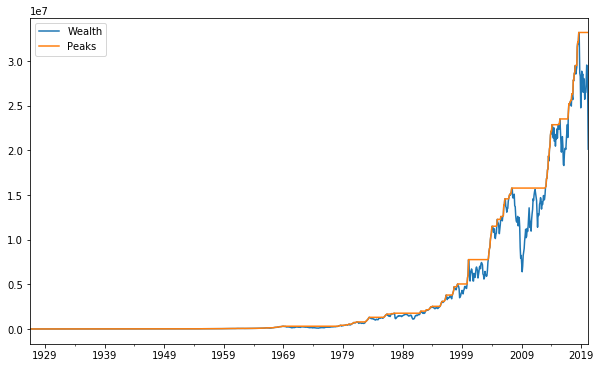

In [12]:
mod.drawdown(rets["SmallCap"])[['Wealth','Peaks']].plot(figsize = (10,6))

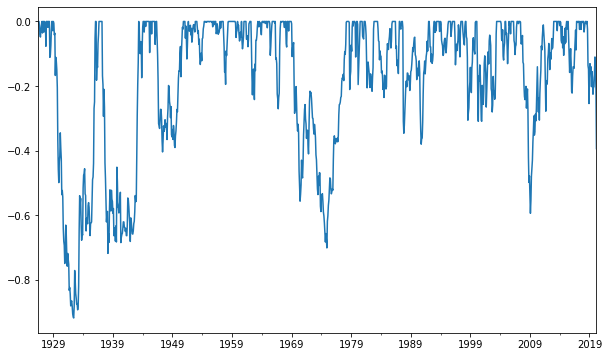

In [13]:
mod.drawdown(rets["SmallCap"])['Drawdown'].plot(figsize = (10,6))

In [14]:
print(mod.drawdown(rets["SmallCap"])['Drawdown'].min()) # tells the highest dip
print(mod.drawdown(rets["SmallCap"])['Drawdown'].idxmin()) # tells when we had highest dip

-0.9180894516652164
1932-06


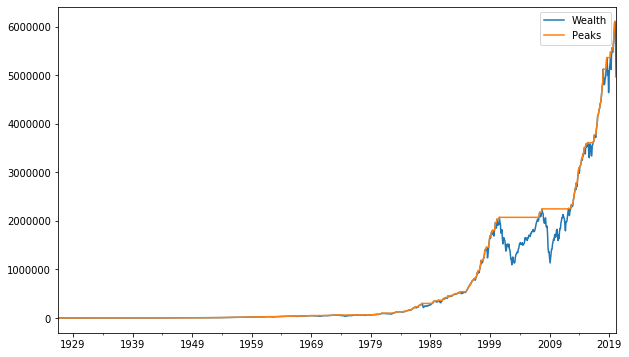

In [15]:
mod.drawdown(rets["LargeCap"])[['Wealth','Peaks']].plot(figsize = (10,6))

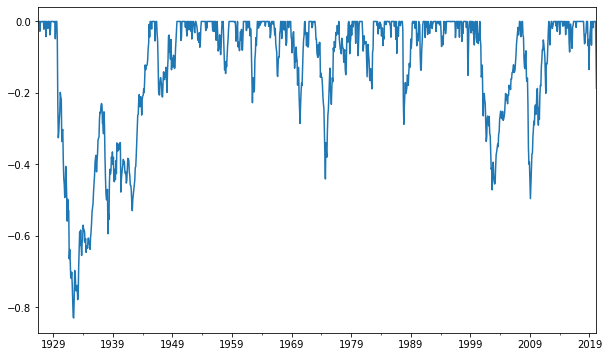

In [16]:
mod.drawdown(rets["LargeCap"])['Drawdown'].plot(figsize = (10,6))

**Drawdowns** are very popular measures and they can provide many insights as we saw in *min()* commmand but they are purely dependent on 2 data points so they are prone to errors due to **Outliers**. So, if we want them for analysis ten we need to clear outliers from data using concept of quartiles.

<hr/>

## Jareque-Bera Test
When we see a time series of returns it simplifies things a lot if we assume that they are **Normally Distributed** but this may come with errors.
Eg. In normal distribution observations are symmetrical around mean and probability of lying far from mean decreases with distance but ths is not true in real life as in real market situations market crashes happens a lot and return me go way furthur then mean on the downside or opposite may happen.
So, to know that our return series is normal or not we can use Jarque-Bera Test.
Hypothesis of Jareque-Bera Test = "Given series is normally distributed"
It return 2 values the *Test Statistics* and *p - value* of the hypothesis.

#### Parameters required for Test
**Skewness**: Measures assymetry of the curve. (*Note: For Normal Distribution Skewness = 0*)<br>
*scipy.stat.skew()* can be used<br>But to avoid multiple imports Module contains **skewness(r)** where r  is the return series.<br>
$$ S(R) = \frac{E[(R - E[X])^3]}{\sigma_R^3}$$<br>

**Kurtosis**: Measures fatness of the tail of distribution. (*Note: For Normal Distribution kurtosis = 3*)<br>
*scipy.stat.kurtosis()* can be used<br>But to avoid multiple imports Module contains **kurtosis(r)** where r  is the return series.<br>
$$ S(R) = \frac{E[(R - E[X])^4]}{\sigma_R^4}$$
*Note: scipy kurtosis gives excess kurtosis ie; (kurtosis - 3) unlike kurtosis() of module.py*<br>
This function is already coded inside *scienitific python* module but to avoid writing the import statement again and again it is being coded in module doing all import work.<br><br> **def JB_Test(r, level=0.01)** *where r is return series and level is level of confidence by default which is setted to 1%.*<br> JB_Test will output true if the p-value is greater than confidence level.

<hr/>

In [17]:
hfi = pd.read_csv("hedgefundindices.csv",header = 0, index_col = 0, parse_dates =True)
hfi = hfi/100
hfi.index = hfi.index.to_period('M')
hfi.head(3)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077


In [18]:
mod.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [19]:
mod.skewness(np.random.normal(loc = 0, scale = 1, size = (9000,1) ))
# we can see skewness of normal is close to 0

-0.0038892596878657114

In [20]:
mod.kurtosis(hfi).sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

In [21]:
mod.kurtosis(np.random.normal(loc = 0, scale = 1, size = (9000,1) ))
# kurtosis is approximately 3.0

2.9986416257291153

In [22]:
hfi.aggregate(mod.JB_Test)
# aggregate applies this function to all columns separatly otherwise it will consider whole data as single time series.

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [23]:
mod.JB_Test(np.random.normal(loc = 0, scale = 1, size = (9000,1) ))

True

<hr/>

## Value at Risk(VaR)
This is measure of potential risk that can happen at a point of time.<br>
It is calculate wrt to some confidence level which means by that confidence we can say that we can loose more than Var.<br>
*Note: It is reported as positive number.*
There are many ways of calulating it, But we will look on some of them:<br>
**1.** **Historic Data**: We can simply ignore confidence level pecentage of maximum losses and take the next largest loss.<br>
>*pros* =  We donot make any assumption.<br>
>*cons* =  We donot make any assumption so we are strongly dependent on data and VaR becomes senitive to observation window.<br>

<br> **def var_historic(r, level = 2)** r is return series and level is confidence level default at 2%. 
<br>

**2.** **Parametric (*Gaussian*)**: Here we assume that returns are normally distributed and use $\alpha$-quantile.<br>
&nbsp;&nbsp; We use $Z_\alpha$ for our purpose.
<br> $$P(\frac{R_p - \mu_p}{\sigma_p} \leq Z_\alpha) = \alpha$$
<br> $$\implies P(R_p \leq  \mu_p + Z_\alpha * \sigma_p) = \alpha$$
<br> $$\implies Var = -( \mu_p + Z_\alpha * \sigma_p )$$
<br>&nbsp;&nbsp; Interpreted as with $\alpha\%$ chance I will adhere losses less than Var.<br>
> *pros* =  Normality assumption makes things easier.<br>
> *cons* =  Normality assumption brings error return series is not always normal.<br>
<br>

**3.** **Semi-Parametric (*Cornish-Fisher*)**:In paramertic problem arises due to normality assumption so, Cornish-Fisher suggested a correction using *Skewness* & *Kusrtosis*.
<br> $$\tilde{Z_\alpha} = Z_\alpha + \frac{(Z_\alpha^2 - 1)S}{6} + \frac{(Z_\alpha^3 - 32Z_\alpha)(K - 3)}{24} - \frac{(2Z_\alpha^3 - 5Z_\alpha)S^2}{36}$$
<br> $$ where,\, S\,=\,Skewness$$
$$ \qquad \,K\,=\,Kurtosis$$
Doing analysis as previous case,
<br> $$P(\frac{R_p - \mu_p}{\sigma_p} \leq \tilde{Z_\alpha}) = \alpha$$
<br> $$\implies Var = -( \mu_p + \tilde{Z_\alpha} * \sigma_p )$$

**def var_gaussian(r, level=2, modified = False)** Is set modified as True then gives output with Cornish-Fisher correction.

<hr/>

In [24]:
hfi = pd.read_csv("hedgefundindices.csv",header = 0, index_col = 0, parse_dates =True)
hfi = hfi/100
hfi.index = hfi.index.to_period('M')
hfi.head(3)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077


In [25]:
mod.var_historic(hfi, level = 5)


Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [26]:
mod.var_gaussian(hfi, level = 1)
# Gaussian Assumption

Convertible Arbitrage     0.032960
CTA Global                0.050107
Distressed Securities     0.032623
Emerging Markets          0.069296
Equity Market Neutral     0.014380
Event Driven              0.032533
Fixed Income Arbitrage    0.022428
Global Macro              0.028780
Long/Short Equity         0.039956
Merger Arbitrage          0.016978
Relative Value            0.020873
Short Selling             0.112563
Funds Of Funds            0.031880
dtype: float64

In [27]:
mod.var_gaussian(hfi, level = 1, modified = True)
# Cornish - Fisher

Convertible Arbitrage     0.100100
CTA Global                0.046612
Distressed Securities     0.057506
Emerging Markets          0.127977
Equity Market Neutral     0.040248
Event Driven              0.057035
Fixed Income Arbitrage    0.060776
Global Macro              0.022236
Long/Short Equity         0.051614
Merger Arbitrage          0.032882
Relative Value            0.046398
Short Selling             0.109810
Funds Of Funds            0.050031
dtype: float64

<hr/>

## CVaR ( Conditional VaR )
Expectation of losses worse than VaR.
<br> $$CVaR = -E[ R | R \leq -VaR ]$$
<br> $$\implies CVaR = \frac {-\int_{-\infty}^{-VaR} x.f_R(x)}{F_R(-VaR)}$$
<br> **mod.cvar(r, level = 5,gaussian = False, modified = False)** r is return series and level is confidence level.
<br> *gaussian* when True uses VaR with Gaussian assumotion and when *modified* is True with that then it also include Cornish-Fisher Correction.
<br> But it can be observed below that CVaR donot change so, we don't need to use thrid and fourth argument.
<br>
<hr/>

In [28]:
mod.cvar(hfi, level = 5)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [29]:
mod.cvar(hfi, level = 5, gaussian = True)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [30]:
mod.cvar(hfi, level = 5, gaussian = True, modified = True)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

<hr/>

## Portfolio Optimisation
**Terminology :**<br>
**1.** **Portfolio** : A portfolio is a grouping of financial assets such as stocks, bonds, commodities, currencies and cash equivalents, as well as their fund counterparts, including mutual, exchange-traded and closed funds. A portfolio can also consist of non-publicly tradable securities, like real estate, art, and private investments.
<br> **2.** **Risk** : Risk is defined as the chance that an outcome or investment's actual gains will differ from an expected outcome or return.
<br> &nbsp;&nbsp;&nbsp;&nbsp;   **a.** **Specific Risk** : It is a hazard that applies only to a particular company, industry, or sector.
<br> &nbsp;&nbsp;&nbsp;&nbsp;   **b.** **Systematic Risk** : Systematic risk is the risk inherent to the entire market or market segment. Eg. Stock market crash due to COVID-19.
<br> There are more classifications of risk but for purpose of our analysis we need these two.

##### Diversification
*def*: Diversification is a risk management strategy that mixes a wide variety of investments within a portfolio. A diversified portfolio contains a mix of distinct asset types and investment vehicles in an attempt at limiting exposure to any single asset or risk. This is done to protect wealth from **Specific Risk**.
<br>*Note:* We take all our wealth and distribute it in each asset according to some weights an we will try to find optiimal weights using optimisation.
<br> **Return in a Diversified Portfolio:** Weighted Average of returns of all assets in portfolio.
<br>**Risk in a Diversified Portfolio:** It is dependent on correlation between assets and there are many techniques to calculate it but we will use the trivial method ie; assign risk as the covariance between assets.

##### Motivation
It is observed that if I have two return time series of returns and they are not perfectly correlated with each other then I can always find some combination of weights such that I get the superimposed risk less than either of their individual risks.
<br> But if this is not the case then I go with the assets having least volatility ( or risk ).

## Markowitz Portfolio Theory 
Motivation of the theory is described above. Here we try to find a optimal region for a given set of constraints and objective function.
But from that feasible region we don't need whole bunch of portfolios but we need the ones which **have lowest volatility for a given target return levels** or **highest returns for a given volatility level**.
##### Notations
$w_i$ = weight of $i^{th}$ asset in total on n-asset portfolio.<br>
$r_i$ = retuns of $i^{th}$ asset in total on n-asset portfolio.<br>
$\sigma_i$ = volatility of $i^{th}$ asset in total on n-asset portfolio.<br>

##### Conditions of Optimisation corresponding to Portfolio P
Objective Function: **Minimising volatility**
$$\begin{equation*}
\begin{aligned}
& \underset{\sigma_p^2}{\text{minimize}}
& & \sum_{i=1}^{n}\sum_{j=1}^{n} w_iw_j\sigma_{ij} \\
& \text{subject to}
& & \sum_{i=1}^{n} w_ir_i = R_p^2 \,,\qquad where\, R_p\,is\,Target\,Return\\
& & &\sum_{i=1}^{n}w_i = 1\\
& & &  w_i \geq 0 \forall, \; i = 1, \ldots, m\\
\end{aligned}
\end{equation*}$$<br><br>
**matrix notation**
$$\begin{equation*}
\begin{aligned}
& \underset{\sigma_p}{\text{minimize}}
& & \mathbf{W}^\intercal\mathbf{\sum} \mathbf{W}\,,\qquad\,\,\,\, \mathbf{W}\, is \,weight\, vector\, and \mathbf{\sum} \,is\, covariance \,matrix\\
& \text{subject to}
& &  \mathbf{W}^\intercal \mathbf{R} = R_p\,, \qquad \mathbf{R}\,is \,return\,vector\\
& & &  \mathbf{W}^\intercal \mathbf{1} = 1\\
& & & \mathbf{W} \succeq 0.\\
\end{aligned}
\end{equation*}$$
<br><br>
**portfolio_return(weights, returns)** Function is already present to calculate Return.<br>
**portfolio_vol(weights, returns)** Function is already present to calculate Volatility.<br>
**minimize_vol(target_return, er, cov)** Gived optimal weights for given target return, er(expected return vector from past data) and cov(covariance matrix from past data).
<br>**plot_ef(n_points, er, cov, style = ".-", show_cml = False, riskfree_rate = 0, show_ew = False, show_gmv = False)** plots efficient frontier. Look for first 3 parameters now rest are explained in furthur cells. n_points is number of points required in frontier.
<br><hr/>

In [31]:
ind = pd.read_csv("ind30_vw_rets.csv", header = 0, index_col = 0, parse_dates = True)/100
ind.index = pd.to_datetime(ind.index, format = "%Y%m").to_period('M')
ind.columns = ind.columns.str.strip()
er = mod.annualize_rets(ind["1997":"2007"], 12)
cov = ind["1997":"2007"].cov()

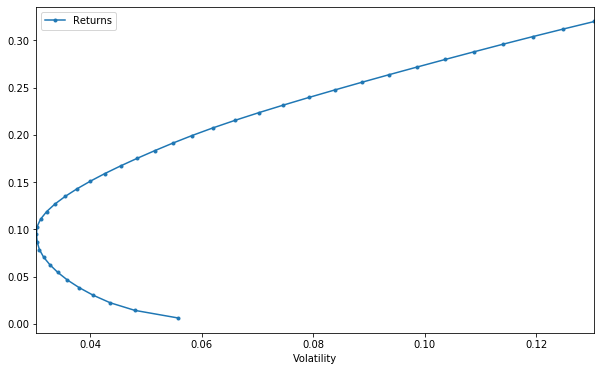

In [32]:
mod.plot_ef(40, er, cov)

In [33]:
#lets's select 17% return
wt = mod.minimize_vol(17, er, cov)
print(wt)

[1.07953275e-15 5.46027843e-16 3.61937224e-12 1.03609600e-12
 5.23134203e-15 2.14465395e-15 1.72230717e-15 3.35480082e-15
 5.14924164e-16 1.27578217e-15 5.26553854e-16 7.29946571e-13
 8.89332379e-13 3.13641616e-12 1.30214863e-15 4.83721159e-13
 1.63321138e-12 1.00000000e+00 5.90511756e-10 1.56501651e-12
 9.95005371e-16 1.20870943e-15 8.49221787e-16 6.73969947e-16
 2.75018969e-15 1.58194229e-15 6.11696508e-15 2.66951940e-15
 2.09110909e-15 1.89680908e-15]


In [34]:
wt = mod.minimize_vol(15, er, cov)
wt

array([3.84252724e-15, 1.45689419e-14, 1.73989651e-13, 1.19502868e-13,
       1.02151039e-14, 7.81718675e-14, 2.81622558e-15, 8.79945072e-15,
       2.32445878e-15, 1.49370721e-15, 1.35115517e-14, 5.90888321e-14,
       1.30529193e-13, 1.50907188e-13, 7.05544783e-14, 6.02252219e-14,
       9.67759636e-14, 1.00000000e+00, 7.96676656e-11, 1.02672414e-13,
       9.52421964e-15, 1.35069907e-14, 8.36313014e-15, 1.35439411e-14,
       2.11527170e-14, 1.14913700e-14, 3.59784868e-14, 3.91271777e-14,
       5.03737785e-14, 1.01223117e-15])

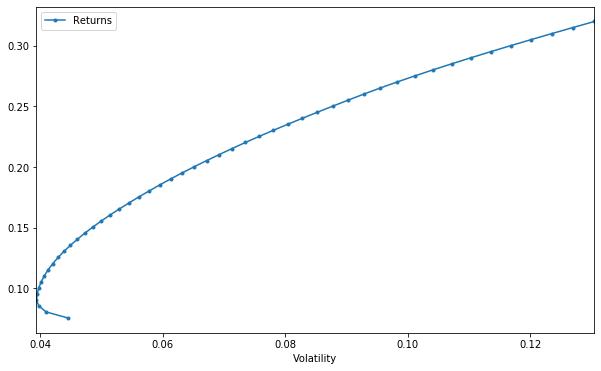

In [35]:
# lets take few sectors
sector = ["Smoke","Fin","Games","Coal", "Books", "Chems"]
mod.plot_ef(50, er[sector], cov.loc[sector,sector])

In [36]:
wt = mod.minimize_vol(15, er[sector], cov.loc[sector,sector])
wt

array([7.20390399e-13, 1.82700362e-15, 1.57734300e-14, 1.00000000e+00,
       2.38770389e-16, 5.24296897e-16])

<hr/>

## Risk Free Asset and Efficient Frontier
**Risk Free Asset :** A risk-free asset is one that has a certain future return—and virtually no possibility of loss. Eg, Debt obligations issued by the U.S. Department of the Treasury (bonds, notes, and especially Treasury bills) are considered to be risk-free.<br> 
In general investors donot construct portfolio entirely of assets which have significant amount of associated risk they also introduce risk free assets.<br>>
*But introduction of risk free asset change shape of efficient frontier, **now we get a straight line of feasible portfolios**.* 
<br>If we place risk ftee asset on y - axis and extend a line to the curve of efficient frontier of risky asset then we get a bunch of feasible portfolio but the we want to maximise the slope of that line so that we get best reward on per unit risk we take so, the required line is the tangent to curve. This line is also called **Capital Market Line**.
<br> And there we get only one portfolio at the point of intersection of Capital Market Line and the Risky asset Efficient Frontier which is called **Maximum Sharpe Ratio Portfolio**.(*Note the slope of capital market line is the sharpe ratio of our maximum sharpe ratio portfolio.*) <br>
Investors generally, prefer to hold **Maximum Sharpe Ratio portfolio as it has Zero Exposure to specific risk.**
$$\qquad \qquad \qquad \qquad \qquad SR_P = \frac{\mu_P - r_f}{\sigma_p}\,, \qquad where\,r_f\,is\,the\,risk\,free\,rate$$
$$\implies SR_P = \frac{\sum_{i=1}^{n} w_i\mu_i - r_f}{\sqrt{\sum_{i=1}^{n}\sum_{j=1}^{n} w_iw_j\sigma_{ij}}}$$
**for this purpose we need to use the previous function with *show_cml* set to True and providing the *riskfree_rate***.<br><hr/>

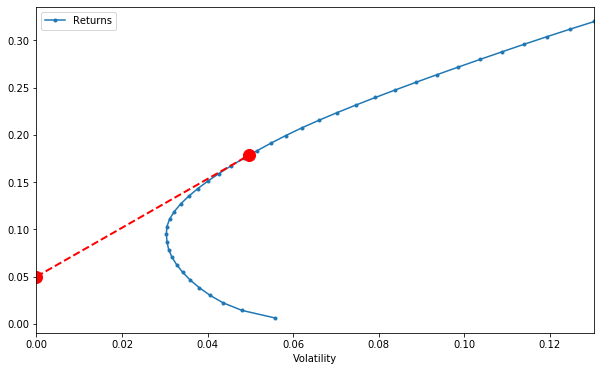

In [37]:
# say risk free rate is 5%
mod.plot_ef(40, er, cov, show_cml = True, riskfree_rate = 0.05)

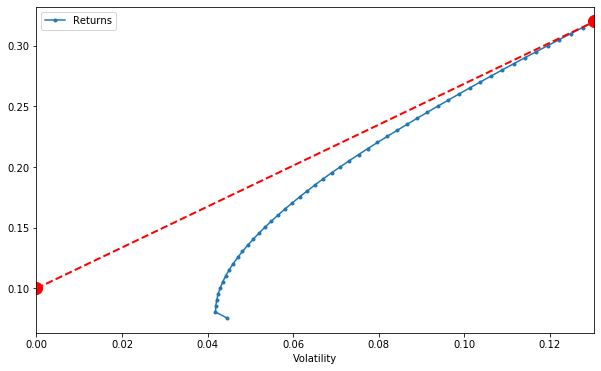

In [38]:
# lets do that for some sectors
# say risk free rate is 10% here
sector = ["Fin","Games","Coal", "Books", "Chems"]
mod.plot_ef(50, er[sector], cov.loc[sector,sector], show_cml = True, riskfree_rate = 0.10)

<hr/>

## Cons of Markowitz Analysis
It is being observed that expected returns contain more noise. Over time many corrections using statistics has been introduced in calculation of covaiance matrix but we don't have sufficient tools to do that with expected returns. So, to avoid these we look for minimising volatility as that doesnt depends on expected returns so, make us safe from that noise. We minimse volatility because as we want to maxmise our sharpe ratio and if we donot depend our analysis on returns the maximising sharpe ratio is equivalently minimising of volatility.<br>
<br>
**Global Minimum Variance Portfolio :** The global minimum variance portfolio is the portfolio that provides you with the lowest possible portfolio volatility, for a number of underlying assets. It is the leftmost point of the risky asset efficient frontier.
<br><br>
**gmv(cov)** when we input covariance matrix it outputs the weights of global minimum variance portfolio.<br>
In the previous plot function if we set **show_gmv** as True then it will plot this.
<br>
Moreover all this there is one more argurment **show_ew** which when set True gives the simplest portfolio which is the portfolio with all assets having equal share of investment in them.
<br><hr/>

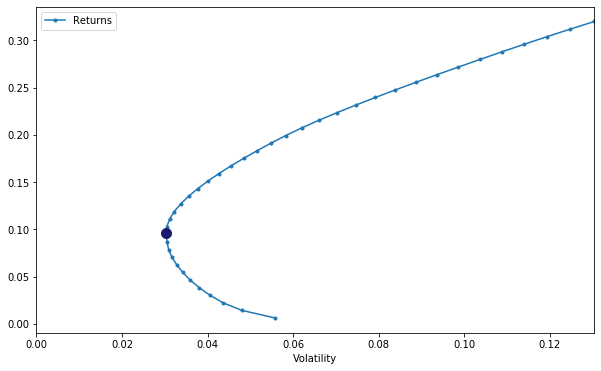

In [39]:
# Global Minimum Variance Portfolio
mod.plot_ef(40, er, cov, show_gmv = True)

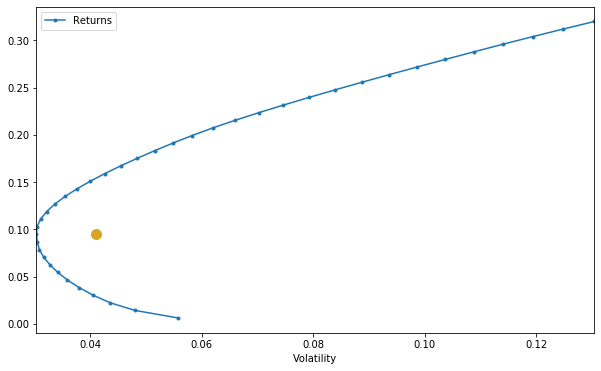

In [40]:
# Equal weighted Portfolio
mod.plot_ef(40, er, cov, show_ew = True)

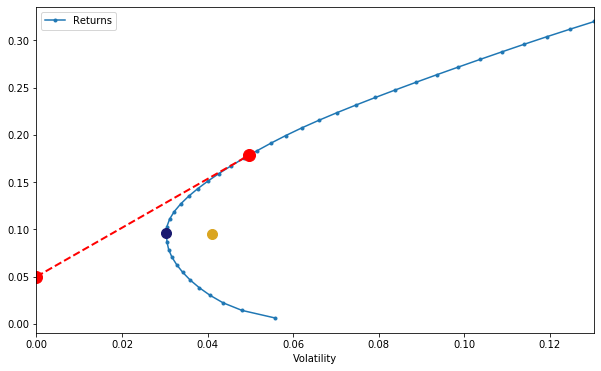

In [41]:
# Let's draw all the above portfolios to get clear comparison.
mod.plot_ef(40, er, cov, show_cml = True, riskfree_rate = 0.05, show_gmv = True, show_ew = True)

<hr/>

## Analysis of Markowitz by IPYWidgets.
<hr/>

In [42]:
mark_interact = widgets.interactive(mod.plot_ef,
                                    n_points = widgets.IntSlider(min = 1, max = 1000, step = 1, value = 50),
                                    riskfree_rate = (0, 0.2, 0.01),
                                    er = widgets.fixed(er),
                                    cov = widgets.fixed(cov),
                                    show_cml = widgets.fixed(True),
                                    show_gmv = widgets.fixed(True),
                                    show_ew = widgets.fixed(True),
                                    style = widgets.fixed(".-")
                                   )
display(mark_interact)
# Due to speed of matplotlib plotting can be slow so, n_points should be set according to kernel speed.

interactive(children=(IntSlider(value=50, description='n_points', max=1000, min=1), FloatSlider(value=0.0, des…

<hr/>

## Limitations of Diversification
As mentioned before it is beneficial to diversify portfolios to get protection against **specific risk** but now we address the issue whether diversification works against **systematic risk** or not.<br>
*For this purpose we will try to plot returns market capital indices so that we can know how market behaves in presence of systematic risk*. Our data will conatin periods like 1996 and 2008 when world faced major market crashes.
<br><hr/>

In [43]:
# returns of market sectors.
ind_return = pd.read_csv("ind30_vw_rets.csv", header = 0, index_col = 0, parse_dates = True)/100
ind_return.index = pd.to_datetime(ind_return.index, format = "%Y%m").to_period('M')
ind_return.columns = ind_return.columns.str.strip()
print(ind_return.shape)
# size of each sector.
ind_size = pd.read_csv("ind30_size.csv", header = 0, index_col = 0, parse_dates = True)
ind_size.index = pd.to_datetime(ind_size.index, format = "%Y%m").to_period('M')
ind_size.columns = ind_size.columns.str.strip()
print(ind_size.shape)
# nuumber of firms in each sector
ind_nfirms = pd.read_csv("ind30_nfirms.csv", header = 0, index_col = 0, parse_dates = True)
ind_nfirms.index = pd.to_datetime(ind_nfirms.index, format = "%Y%m").to_period('M')
ind_nfirms.columns = ind_nfirms.columns.str.strip()
print(ind_nfirms.shape)

(1110, 30)
(1110, 30)
(1110, 30)


In [44]:
ind_return.head(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676


In [45]:
ind_size.head(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,...,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,...,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51


In [46]:
ind_nfirms.head(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [47]:
# Computing market capital present in each sector at a given point of time
ind_mktcap = ind_nfirms * ind_size
print(ind_mktcap.shape)
ind_mktcap.head()

(1110, 30)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
1926-10    28057.23
1926-11    27198.40
Freq: M, dtype: float64


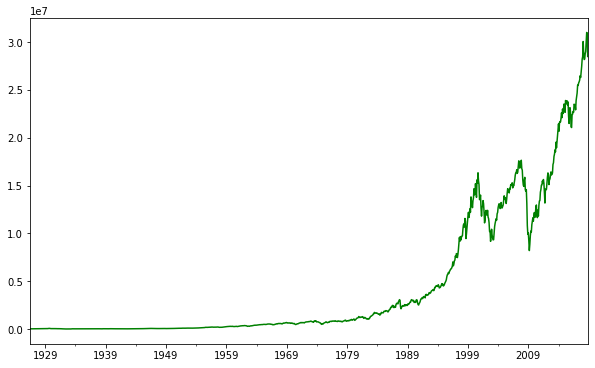

In [48]:
# Total market capital at a given point of time.
# calculated as sum of entries in a particular row.
total_mktcap = ind_mktcap.sum(axis = "columns")
print(total_mktcap.head())
total_mktcap.plot(figsize = (10,6), color = "green")

In [49]:
# to know fraction of capitalin each industry we need to divide each industry's capital by total market cap at that point of time
ind_capweight = ind_mktcap.divide(total_mktcap, axis ="rows")
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


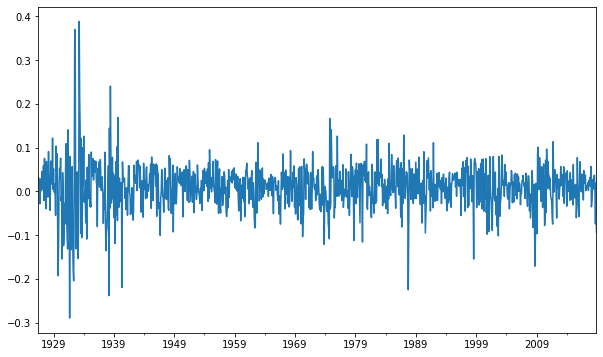

In [50]:
total_market_return = (ind_capweight*ind_return).sum(axis = "columns")
total_market_return.plot(figsize = (10,6))

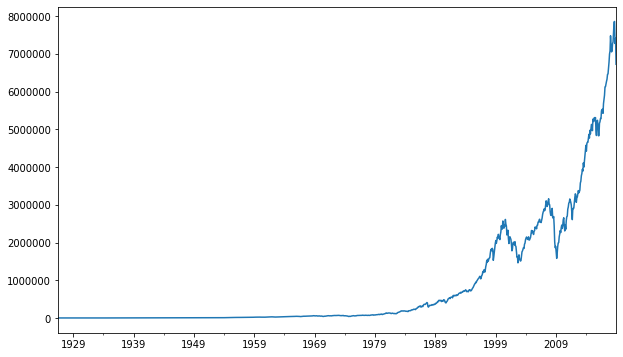

In [51]:
# Market Capitalised Index Construction
# total_market_index is wealth index from total_market_return
total_market_index = mod.drawdown(total_market_return).Wealth
# since we already have drawdown function which calculates Wealth index.
total_market_index.plot(figsize = (10,6))

In [52]:
ts_corr = ind_return["1996":"2012"].rolling(window = 36).corr()
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()
# it basically gives correlation of one sector with others at a particular point of time

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2012-12 Whlsl     0.731527  0.453078  0.489773  0.774830  0.811625  0.720606   
        Rtail     0.610581  0.586030  0.513218  0.715948  0.736627  0.657075   
        Meals     0.662766  0.494237  0.489991  0.809206  0.633464  0.570549   
        Fin       0.704853  0.477513  0.447614  0.765480  0.882870  0.714614   
        Other     0.673299  0.507182  0.445206  0.590019  0.838171  0.642407   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2012-12 Whlsl     0.716764  0.725351  0.864597  0.849194  ...  0.771389   
        Rtail     0.809880  0.718427  0.749452  0.805255  ...  0.736607   
        Meals     0.745681  0.526171  0.776801  0.748399  ...  0.670607   
        Fin       0.668618  0.738391  0.871226  0.790941  ...  0.796833   
        Other     0.553947  0.763379  0.755267  0.670942  ...  0.797079   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2012-12 Whlsl     0.847355  0.856115  0.905570  0.898738  1.000000  0.802879   
        Rtail     0.813036  0.840021  0.753488  0.785817  0.802879  1.000000   
        Meals     0.720840  0.718357  0.757400  0.742118  0.694806  0.710349   
        Fin       0.872476  0.850904  0.882569  0.800504  0.887593  0.767939   
        Other     0.804721  0.777261  0.820781  0.721898  0.794141  0.753205   

                     Meals       Fin     Other  
date    industry                                
2012-12 Whlsl     0.694806  0.887593  0.794141  
        Rtail     0.710349  0.767939  0.753205  
        Meals     1.000000  0.653904  0.576315  
        Fin       0.653904  1.000000  0.856847  
        Other     0.576315  0.856847  1.000000  

[5 rows x 30 columns]

In [53]:
# average correlation in 2018
ind_tr36corr = ts_corr.groupby(level = 'date').apply(lambda cormat: cormat.values.mean())

In [54]:
# returns of total market index
# first variable finds the return of cummulative  trailing 2 years of my total market cap index
tmi_tr36rets = total_market_return["1996":"2012"].rolling(window = 36).aggregate(mod.annualize_rets, periods_per_year = 12)

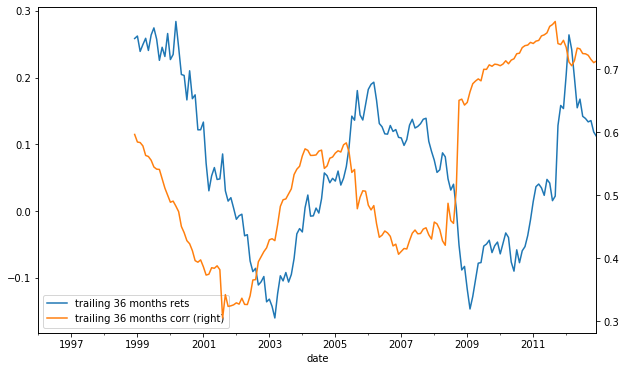

In [55]:
# this graph is very important to understand the limitations of Diversification.
tmi_tr36rets.plot(label = "trailing 36 months rets",figsize = (10,6), legend = True)
ind_tr36corr.plot(label = "trailing 36 months corr", legend=True, secondary_y=True)

*It is evident from above graph that whenever total market return goes down ie; almost all the sectors of market are performing badly then correlation also increases in magnitude ie; diversification is failing as for diversification we need very low correlation. So, In presence of systematic risk diversification will not bail us out.*

<hr/>

# Constant Proportion Portfolio Insurance(CPPI)
As we saw earlier that it is beneficial to invest in combination of risky assets and safe asset. In real life scenarios we saw the evidence that diversification is not enough to bail us out from systematic market risk. But dynamic allocation of portfolio can be a smart option. In this way we periodically reallocate out wealth in risky assets and safe assets by keeping track on market situations. One basic strategy for this can be CPPI.<br>
<br>
### CPPI Strategy
In this strategy we do following steps:
<ul>
    <li> We set a <b>Floor</b>(It is the minimum acceptable asset value after incurred losses).</li>
    <li> We calculate <b>Cushion</b> = <i>(Current Asset Value - Floor)</i>.</li>
    <li> Allocation in risky asset is done by selecting a <b>Multiplier</b>(say, M) and allocation is done as (M*Cushion). And rest is allocated in safe asset.</li>
</ul>
<br><br>

### Reallocation Period and Gap Risk
If we go according to theory then we need to trade continuously but it is not practical.<br>
In real life scenarios reallocation is done in a discrete manner rather than continuous. So, if before we reallocate our wealth between risky assets and risk free assets then there might be a possibility of floor violations and this risk is generally termed as *gap risk*.<br>
In a stable market ie; market with low volatility we can be flexible with trading periods and even have high M but as volatility in market increases then we need to reallocate more often and be less aggresive with risk we take ie; our more allocation should be in safe asset rather than risky assets.
<br>
<hr/>

In [56]:
ind_return = pd.read_csv("ind30_vw_rets.csv", header = 0, index_col = 0, parse_dates = True)/100
ind_return.index = pd.to_datetime(ind_return.index, format = "%Y%m").to_period('M')
ind_return.columns = ind_return.columns.str.strip()
ind_return.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [57]:
risky_r = ind_return
risky_r.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [58]:
def run_cppi(risky_r, safe_r = None, m = 3, start = 1000, floor = 0.8, riskfree_rate = 0.03, drawdown = None):
    """
    Run a backtest of the CPPI strategy, given a set of returns for the risky asset
    Returns a dictionary containing: Asset Value History, Risk Budget History, Risky Weight History
    """
    date = risky_r.index
    n_steps = len(date)
    account_value = start
    floor_value = start*floor
    peak = start
    
    if isinstance(risky_r, pd.Series):
       risky_r =  pd.DataFrame(risky_r, columns = ["R"])
    
    if safe_r is None:
        safe_r = pd.DataFrame().reindex_like(risky_r)
        safe_r[:] = riskfree_rate/12
    
    account_history = pd.DataFrame().reindex_like(risky_r)
    cushion_history = pd.DataFrame().reindex_like(risky_r)
    risky_w_history = pd.DataFrame().reindex_like(risky_r)

    for step in range(n_steps):
        if drawdown is not None:
            peak = np.maximum(peak, account_value)
            floor_value = peak*(1-drawdown)
        cushion = (account_value - floor_value)/account_value
        risky_w = m*cushion
        risky_w = np.minimum(risky_w, 1) # since if account value  is 1000 and floor at 400 then 40% cushion meaning allocation to be 3*40 = 120% so we need to eliminate that.
        risky_w = np.maximum(risky_w, 0) # to get non negative ie; no shorting
        safe_w = 1-risky_w
        risky_alloc = account_value*risky_w
        safe_alloc = account_value*safe_w
        ## Update the account
        account_value = (risky_alloc*(1 + risky_r.iloc[step])) + (safe_alloc*(1 + safe_r.iloc[step]))
        ## save the value in history
        cushion_history.iloc[step] = cushion
        risky_w_history.iloc[step] = risky_w
        account_history.iloc[step] = account_value
        
    risky_wealth = start*(1 + risky_r).cumprod() # 0% safe asset for comparison
    backtest_result = {
        "Wealth": account_history,
        "Risky Wealth": risky_wealth, 
        "Risk Budget": cushion_history,
        "Risky Allocation": risky_w_history,
        "m": m,
        "start": start,
        "floor": floor,
        "risky_r":risky_r,
        "safe_r": safe_r
    }
    return backtest_result


In [59]:
back_tst = run_cppi(risky_r = ind_return["2000":])

In [60]:
mod.summary_stats(back_tst["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Corrected VaR (2%),Historic CVaR (2%),Sharpe Ratio,Max Drawdown
Food,0.084370,0.113131,-0.756737,4.059098,0.052253,0.075925,0.467623,-0.310964
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.383772,-0.259582
Smoke,0.163899,0.219881,-0.036067,6.907030,0.085097,0.135933,0.592459,-0.433692
Games,0.054337,0.181041,-0.838604,5.301892,0.089273,0.130189,0.130595,-0.587946
Books,0.004151,0.122796,-0.065173,5.096236,0.056362,0.076712,-0.205019,-0.354533
Hshld,0.056550,0.111771,-0.675271,4.877577,0.052520,0.074836,0.231054,-0.357862
Clths,0.106051,0.183752,-0.206245,4.843609,0.078309,0.110676,0.402602,-0.557511
Hlth,0.068207,0.123249,-0.488015,3.554039,0.056613,0.080991,0.301569,-0.282373
Chems,0.077367,0.175985,-0.576170,6.220066,0.080531,0.121435,0.261735,-0.542704
Txtls,0.029229,0.185429,-1.421624,8.608974,0.097448,0.141183,-0.004306,-0.522228


In [61]:
mod.summary_stats(back_tst["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Corrected VaR (2%),Historic CVaR (2%),Sharpe Ratio,Max Drawdown
Food,0.092157,0.122311,-0.293180,4.751730,0.051588,0.077258,0.494473,-0.310964
Beer,0.082286,0.139058,-0.502368,4.181533,0.063037,0.091442,0.365788,-0.271368
Smoke,0.172486,0.225111,0.068945,6.707293,0.085087,0.135933,0.615820,-0.433692
Games,0.095944,0.256088,-0.302217,5.837818,0.112880,0.172983,0.250289,-0.769843
Books,-0.002305,0.208764,0.352929,7.884185,0.085198,0.128392,-0.150854,-0.773244
Hshld,0.060438,0.132804,-0.763356,4.869427,0.063712,0.093100,0.222904,-0.381500
Clths,0.126087,0.210068,0.075379,5.029064,0.083982,0.124733,0.444948,-0.565758
Hlth,0.074979,0.137710,-0.450856,3.313959,0.063090,0.088233,0.317728,-0.353597
Chems,0.090489,0.205036,-0.189426,4.673005,0.089289,0.127125,0.286878,-0.583971
Txtls,0.070295,0.308916,0.860940,12.650734,0.096461,0.202400,0.126569,-0.779751


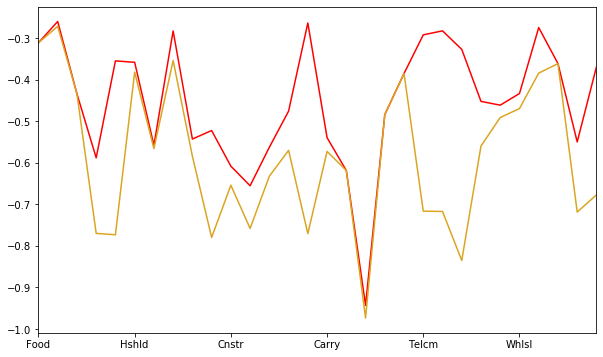

In [62]:
ax = mod.summary_stats(back_tst["Wealth"].pct_change().dropna())["Max Drawdown"].plot(legend  = False, color = "red", figsize = (10,6))
b = mod.summary_stats(back_tst["Risky Wealth"].pct_change().dropna())["Max Drawdown"]
b.plot(ax = ax, legend = False, color = "goldenrod")

<hr/>
For convinience one function named summary stats is added in module named **summary_stats(r)** which just needs return series as input and gives out *Annualized Return*, *Annualized Vol*, *Skewness*, *Kurtosis*, *Cornish-Fisher VaR (confidence 2%)*, *Historic CVaR (confidence2%)*,  * Sharpe Ratio *, *Max Drawdown*.<br><br>
Above graph shows that CPPI works as golden line is when we donot follow CPPI and red is when we follow it and we can see that for all industries the Max Drawdown experienced is less in corresponding industries than non CPPI portfolio.
<hr/>

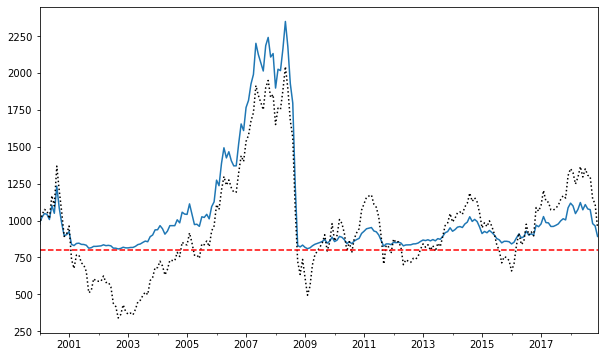

In [63]:
ax = back_tst["Wealth"]["Steel"]["2000":].plot(figsize = (10,6))
back_tst["Risky Wealth"]["Steel"]["2000":].plot(ax = ax, style = "k:") # 100% allocation in risky assets.
ax.axhline(y = back_tst["start"]*back_tst["floor"], color="r", linestyle = "--")

<hr/>
Here we can see how floor(red dotted line) bails us put from large falls in market.
<hr/>

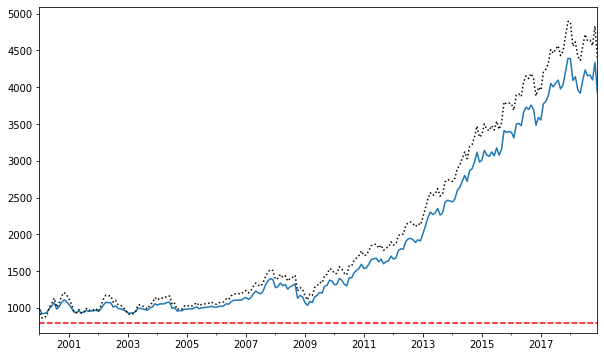

In [64]:
ax = back_tst["Wealth"]["Beer"]["2000":].plot(figsize = (10,6))
back_tst["Risky Wealth"]["Beer"]["2000":].plot(ax = ax, style = "k:")
ax.axhline(y = back_tst["start"]*back_tst["floor"], color="r", linestyle = "--")

<hr/>
In the above graph we can see that graph with whole allocation in risky assets and CPPI graph move together because we have a static floor ie; after sometime martket will go up hence, cushion will eventually become greater than 100% ie; now we want a dynamic floor in which we can insure our portfolio value repective to current market value. It is necessary becuase overtime market value tends to rise and whole curve moves upward so, if in 1990's I am trading a asset at 40 bucks then it doesnt means that I have to secure that return in 2010. This gives the intuition for the neeed of dynamic floor.
<br>
For this purpose run_cppi() has drawdown argument in which we input allowed drawdown and floor is calculated wrt to previous peak achieved by the asset value curve.
<hr/>

In [65]:
back_tst = run_cppi(risky_r = ind_return["2000":], drawdown = 0.20)
# I put dradown as 20% ie; I want to insure the 80% wealth value at previous peak at a certain point in time.

<hr/>
For comparison we can agin look at summmary_stats.
<hr/>

In [66]:
mod.summary_stats(back_tst["Wealth"].pct_change().dropna())
# summary_stats do analysis at default riskfree_rate of 3%. It can be changed by input.

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Corrected VaR (2%),Historic CVaR (2%),Sharpe Ratio,Max Drawdown
Food,0.063294,0.063912,-0.482695,4.114070,0.027015,0.039040,0.506944,-0.135549
Beer,0.056568,0.072510,-0.746848,4.576511,0.033089,0.048819,0.356528,-0.125096
Smoke,0.102794,0.104112,0.015330,6.462610,0.038466,0.057192,0.680419,-0.179318
Games,0.068627,0.097840,-0.421573,4.212640,0.043003,0.061169,0.384131,-0.196321
Books,0.022624,0.074341,0.226090,3.684422,0.031435,0.041470,-0.096650,-0.194002
Hshld,0.045074,0.063228,-0.720578,4.239676,0.029206,0.040892,0.231965,-0.156642
Clths,0.074931,0.092799,-0.174688,3.738975,0.038484,0.054769,0.471141,-0.184017
Hlth,0.055377,0.069607,-0.355624,3.619159,0.030004,0.042899,0.354750,-0.139489
Chems,0.056634,0.083846,-0.561223,3.787829,0.038156,0.052128,0.309067,-0.186340
Txtls,0.058807,0.094762,-0.627485,5.419110,0.043082,0.059046,0.295749,-0.197478


In [67]:
mod.summary_stats(back_tst["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Corrected VaR (2%),Historic CVaR (2%),Sharpe Ratio,Max Drawdown
Food,0.092157,0.122311,-0.293180,4.751730,0.051588,0.077258,0.494473,-0.310964
Beer,0.082286,0.139058,-0.502368,4.181533,0.063037,0.091442,0.365788,-0.271368
Smoke,0.172486,0.225111,0.068945,6.707293,0.085087,0.135933,0.615820,-0.433692
Games,0.095944,0.256088,-0.302217,5.837818,0.112880,0.172983,0.250289,-0.769843
Books,-0.002305,0.208764,0.352929,7.884185,0.085198,0.128392,-0.150854,-0.773244
Hshld,0.060438,0.132804,-0.763356,4.869427,0.063712,0.093100,0.222904,-0.381500
Clths,0.126087,0.210068,0.075379,5.029064,0.083982,0.124733,0.444948,-0.565758
Hlth,0.074979,0.137710,-0.450856,3.313959,0.063090,0.088233,0.317728,-0.353597
Chems,0.090489,0.205036,-0.189426,4.673005,0.089289,0.127125,0.286878,-0.583971
Txtls,0.070295,0.308916,0.860940,12.650734,0.096461,0.202400,0.126569,-0.779751


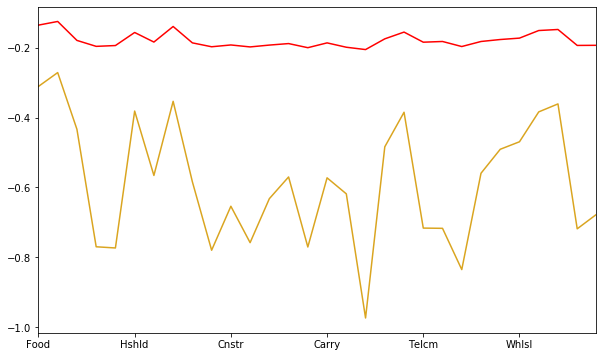

In [68]:
ax = mod.summary_stats(back_tst["Wealth"].pct_change().dropna())["Max Drawdown"].plot(legend  = False, color = "red", figsize = (10,6))
b = mod.summary_stats(back_tst["Risky Wealth"].pct_change().dropna())["Max Drawdown"]
b.plot(ax = ax, legend = False, color = "goldenrod")

<hr/>

**We can observe that outcomes here are much better than the previous case of static floor.**<br>
Hence, Dynamic allocation of floor is a better option.
<hr/>

<hr/>
<br>

<h1><center><b><font size="8">Conclusion</font></b></center></h1>
Markowitz theorized that investors could design a portfolio to maximize returns by accepting a quantifiable amount of risk. In other words, investors could reduce risk by diversifying their assets and asset allocation of their investments using a quantitative method.
With a well-balanced and calculated portfolio, if some of the assets fall due to market conditions, others should rise an equal amount in compensation, according to MPT. Markowitz demonstrated that, by taking a portfolio as its whole, it was less volatile than the total sum of its parts. *And this is the basis of all analysis done today*. Everything else is just additional tools integrated in it.<br><br>
Similar thing goes for CPPI. We covered bassics of allocation of wealth using CPPI. Other strategies build consider it as basis and adding additonal filters and tools to it.<br><br><br><br>
<hr/>

<hr/><br><br><br>

<h1><center><b><font size="6">List of References</font></b></center></h1>
<ol>
    <li>Investment Science, Book by David Luenberger</li>
    <li>Investopedia</li>
    <li>Money Control</li>
    <li><a href = "url">https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f</a></li>
    <li><a href = "url">https://core.ac.uk/download/pdf/19477154.pdf</a></li>
</ol>
<br><br>

### For Market Data
Kenneth H. French ( Data Library )
<a href = "url">https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html</a>
<br><br><br>
<hr/>
